# Detección de SPAM
Diana Laura Jiménez López



In [ ]:
!pip install stanza #instalamos la paquería stanza si no está

In [ ]:
#Importamos las paqueterías necesarias
import stanza #paquetería de procesaamiento de lenaguje natural
import sklearn #herramienta de machine learning
import pandas as pd #herramienta de manejo de datos

In [ ]:
#Descargamos el corpus
!wget "https://drive.google.com/uc?export=download&id=1p6FeFPEJor5E4Qpi69cckbsKJjeGmKpS" -O corpus.txt

--2023-08-16 06:17:20--  https://drive.google.com/uc?export=download&id=1p6FeFPEJor5E4Qpi69cckbsKJjeGmKpS
Resolving drive.google.com (drive.google.com)... 172.253.115.100, 172.253.115.113, 172.253.115.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p40fsqfmd7vqesp705qd3e8u3vdugqll/1692166575000/04972566095341676886/*/1p6FeFPEJor5E4Qpi69cckbsKJjeGmKpS?e=download&uuid=7e91033a-3561-4d70-875c-f23c1dbda40f [following]
--2023-08-16 06:17:20--  https://doc-0s-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p40fsqfmd7vqesp705qd3e8u3vdugqll/1692166575000/04972566095341676886/*/1p6FeFPEJor5E4Qpi69cckbsKJjeGmKpS?e=download&uuid=7e91033a-3561-4d70-875c-f23c1dbda40f
Resolving doc-0s-64-docs.googleusercontent.com (doc-0s-64-docs.googleusercontent.com)... 172.253.122.132, 

In [ ]:
#Leemos el archivo
f = open('corpus.txt', encoding = "latin8")
text = f.readlines()
text[:10]

['Urgent! call 09061749602 from Landline. Your complimentary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs BOX 528 HP20 1YF 150ppm 18+,spam\n',
 '+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50,spam\n',
 'FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+,spam\n',
 'Urgent! call 09066612661 from landline. Your complementary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs PO Box 3 WA14 2PX 150ppm 18+ Sender: Hol Offer,spam\n',
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,spam\n',
 'okmail: Dear Dave this is your final notice to collect your 4* Tenerife Holiday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326

Iniciamos con el preprocesamiento


1.   Estandarizar: Eliminar elementos no deseados y convertir a minúsculas
2.   Tokenizar
3.   Corrección del texto
4.   Realizar etiquetado por categoría gramatical
5.   Lematizar






In [ ]:
# Quitamos caracteres no deseados y convertimos todo a minúsculas
lines = [line.strip().lower() for line in text]
lines[:10]

['urgent! call 09061749602 from landline. your complimentary 4* tenerife holiday or £10,000 cash await collection sae t&cs box 528 hp20 1yf 150ppm 18+,spam',
 '+449071512431 urgent! this is the 2nd attempt to contact u!u have won £1250 call 09071512433 b4 050703 t&csbcm4235wc1n3xx. callcost 150ppm mobilesvary. max£7. 50,spam',
 'free for 1st week! no1 nokia tone 4 ur mob every week just txt nokia to 8007 get txting and tell ur mates www.getzed.co.uk pobox 36504 w45wq norm150p/tone 16+,spam',
 'urgent! call 09066612661 from landline. your complementary 4* tenerife holiday or £10,000 cash await collection sae t&cs po box 3 wa14 2px 150ppm 18+ sender: hol offer,spam',
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.,spam',
 'okmail: dear dave this is your final notice to collect your 4* tenerife holiday or #5000 cash award! call 09061743806 from landline. tcs sae box326 cw25wx 15

In [ ]:
#Vamos a dar forma al corpus separando los textos de la etiqueta
text = list()
label = list() #las etiquetas asociadas a los documentos

for line in lines:
  aux = line.split(',') #separamos por la coma
  label.append(aux[-1]) #separamos la etiqueta
  del aux[-1]
  text.append(aux[0]) #separamos el documento

text[:10]

['urgent! call 09061749602 from landline. your complimentary 4* tenerife holiday or £10',
 '+449071512431 urgent! this is the 2nd attempt to contact u!u have won £1250 call 09071512433 b4 050703 t&csbcm4235wc1n3xx. callcost 150ppm mobilesvary. max£7. 50',
 'free for 1st week! no1 nokia tone 4 ur mob every week just txt nokia to 8007 get txting and tell ur mates www.getzed.co.uk pobox 36504 w45wq norm150p/tone 16+',
 'urgent! call 09066612661 from landline. your complementary 4* tenerife holiday or £10',
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'okmail: dear dave this is your final notice to collect your 4* tenerife holiday or #5000 cash award! call 09061743806 from landline. tcs sae box326 cw25wx 150ppm',
 '07732584351 - rodger burns - msg = we tried to call you re your reply to our sms for a free nokia mobile + free camcorder. please call now 08000930705 for delive

In [ ]:
# La paqueteria Stanza ayuda a procesar lenguaje natural mediante un "pipeline"
nlp = stanza.Pipeline(lang='en', processors='tokenize, mwt, pos, lemma')

pre = list()

for i in text:
  pre.append(nlp(i))

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
print(*[f'word: {word.text+" "}\tpos: {word.pos}' for sent in pre[6].sentences for word in sent.words], sep='\n') #imprimimos el POS de las palabras de un documento de ejemplo

word: 07732584351 	pos: NUM
word: - 	pos: PUNCT
word: rodger 	pos: NOUN
word: burns 	pos: NOUN
word: - 	pos: PUNCT
word: msg 	pos: NOUN
word: = 	pos: SYM
word: we 	pos: PRON
word: tried 	pos: VERB
word: to 	pos: PART
word: call 	pos: VERB
word: you 	pos: PRON
word: re 	pos: ADP
word: your 	pos: PRON
word: reply 	pos: NOUN
word: to 	pos: ADP
word: our 	pos: PRON
word: sms 	pos: NOUN
word: for 	pos: ADP
word: a 	pos: DET
word: free 	pos: ADJ
word: nokia 	pos: PROPN
word: mobile 	pos: ADJ
word: + 	pos: SYM
word: free 	pos: ADJ
word: camcorder 	pos: NOUN
word: . 	pos: PUNCT
word: please 	pos: INTJ
word: call 	pos: VERB
word: now 	pos: ADV
word: 08000930705 	pos: NUM
word: for 	pos: ADP
word: delivery 	pos: NOUN
word: tomorrow 	pos: NOUN


In [ ]:
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in pre[6].sentences for word in sent.words], sep='\n') #imprimos los lemmas de un documento de ejemplo

word: 07732584351 	lemma: 07732584351
word: - 	lemma: -
word: rodger 	lemma: rodger
word: burns 	lemma: burn
word: - 	lemma: -
word: msg 	lemma: msg
word: = 	lemma: =
word: we 	lemma: we
word: tried 	lemma: try
word: to 	lemma: to
word: call 	lemma: call
word: you 	lemma: you
word: re 	lemma: re
word: your 	lemma: you
word: reply 	lemma: reply
word: to 	lemma: to
word: our 	lemma: we
word: sms 	lemma: sm
word: for 	lemma: for
word: a 	lemma: a
word: free 	lemma: free
word: nokia 	lemma: nokia
word: mobile 	lemma: mobile
word: + 	lemma: +
word: free 	lemma: free
word: camcorder 	lemma: camcorder
word: . 	lemma: .
word: please 	lemma: please
word: call 	lemma: call
word: now 	lemma: now
word: 08000930705 	lemma: 08000930705
word: for 	lemma: for
word: delivery 	lemma: delivery
word: tomorrow 	lemma: tomorrow


In [ ]:
X_pre = list()

for doc in pre:
  lemmas = list()
  d = doc.to_dict() #stanza nos devuelve un diccionario con todo los elementos asociados al preprocesamiento
  for s in d:
    for w in s:
      try:
        lemmas.append(w["lemma"]) #nos quedamos con los lemmas
      except:
        lemmas.append(w["text"]) #no siempre se logra extraer el lemma eb ese casi nos quedamos con la palabra normal
  X_pre.append(" ".join(lemmas))


Ahora que hemos preprocesado nuestros datos textuales, es momento de volverlos numéricos, primero las etiquetas

In [ ]:
# será 1 si es spam y 0 si es ham
y = [1 if x == 'spam' else 0 for x in label]

Los textos, son un poco más complicados, primero veremos bag of words

In [ ]:
 from sklearn.model_selection import train_test_split #herramienta que nos ayuda a separar el corpus

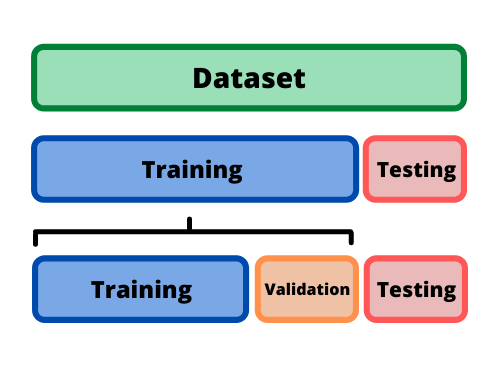

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.33, random_state=42)
print("Tamaño del train set: " +str(len(X_train)))
print("Tamaño del test set: " + str(len(X_test)))

Tamaño del train set: 450
Tamaño del test set: 223


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Declaramos el vectorizador en este caso es un BoW
#El argumento binary nos permite cambiar entre BoW binaria o por frecuencias, el argumento ngram_range nos permite hacer uso de ngramas, este casi utilizaremos unigramas
vectorizer = CountVectorizer(binary = True, ngram_range = (1,1))
x_tr = vectorizer.fit_transform(X_train) #primero entrenamos y transformamos el train
x_te = vectorizer.transform(X_test)

print("VOCABULARY")
print(vectorizer.get_feature_names_out()[400:420])
print("Tamaño del vocabulario: " +str(len(vectorizer.get_feature_names_out())))

VOCABULARY
['150 worth of' '150p' '150p meg' '150p meg cc' '150p minute'
 '150p minute 18' '150p msg' '150p msg cc' '150p msgrcvdhg'
 '150p msgrcvdhg suite342' '150p mtmsg' '150p tone' '150p tone 16' '16'
 '16 118p' '16 118p msg' '16 99' '16 close' '16 close 300603' '16 club']
Tamaño del vocabulario: 9542


In [ ]:
x_tr[0]

<1x9542 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

Es tiempo del modelo ...
Utilizaremos:


*   Naive Bayes
*   Regresión Logística

Como métrica utilizaremos F1 Score

In [ ]:
from sklearn.naive_bayes import MultinomialNB #importamos clasificador naive bayes multinomial (este suele usarse para texto)
from sklearn.linear_model import LogisticRegression #importamos el clasificador rregresión logística
from sklearn.metrics import accuracy_score #importamos la medida exactitud

In [ ]:
clf = MultinomialNB(force_alpha=True) #inicializamos el clasificador
clf.fit(x_tr, y_train) #entreamos

MultinomialNB(force_alpha=True)

In [ ]:
pred = clf.predict(x_te) #generamos predicciones
f = accuracy_score(y_test,pred) #evaluamos
print(f)

0.9596412556053812


In [ ]:
clf = LogisticRegression(random_state=0) #inicializamos el clasificador
clf.fit(x_tr, y_train) #entrenamos

LogisticRegression(random_state=0)

In [ ]:
pred = clf.predict(x_te) #generamos predicciones
f = accuracy_score(y_test,pred) #evaluamos
print(f)

0.9372197309417041


# Gracias c: